In [10]:
from mrcnn.config import Config
import mrcnn.model as modellib
import cv2
import matplotlib.pyplot as plt

In [3]:
class InferenceConfig(Config):
    NAME = 'get-the-fox'
    NUM_CLASSES = 1 + 5  # background + 5 classes
    IMAGES_PER_GPU = 1
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)

class_names = ['BG', 'Fox', 'Person', 'Dog', 'Cat', 'Chicken']
config = InferenceConfig()

model = modellib.MaskRCNN(mode="inference", config=config, model_dir='get-the-fox-master/')

epoch = 10
path = f'mask_rcnn_get-the-fox_{str(epoch).zfill(4)}.h5'
model.load_weights(path, by_name=True)

Processing 1 images
image                    shape: (371, 660, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max:  660.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.70988  max:    1.45890  float32
Fox
0.9923103


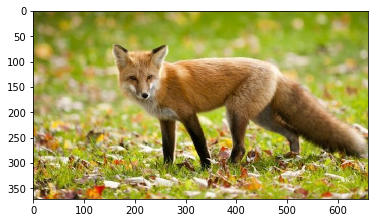

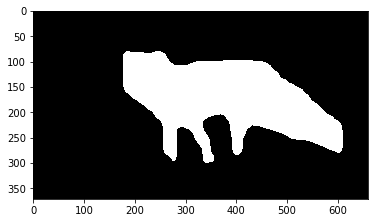

In [42]:
image = cv2.imread('fox.jpg')
results = model.detect([image], verbose=1)
print(class_names[results[0]['class_ids'][0]])
print(results[0]['scores'][0])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(results[0]['masks'][:, :, 0], cmap='gray')
plt.show()

Processing 1 images
image                    shape: (1204, 1280, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.70988  max:    1.45890  float32
Fox
0.8520189


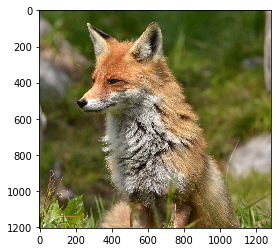

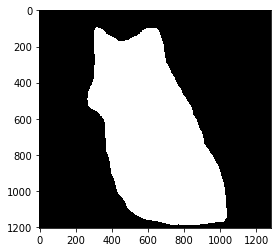

In [45]:
image = cv2.imread('fox2.jpg')
results = model.detect([image], verbose=1)
print(class_names[results[0]['class_ids'][0]])
print(results[0]['scores'][0])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(results[0]['masks'][:, :, 0], cmap='gray')
plt.show()

Processing 1 images
image                    shape: (492, 700, 3)         min:    0.00000  max:  243.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  127.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max:  700.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.70988  max:    1.45890  float32
Person
0.9085604


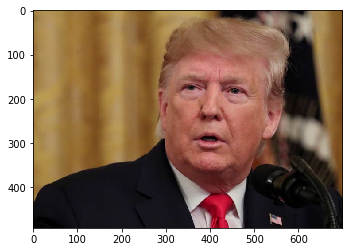

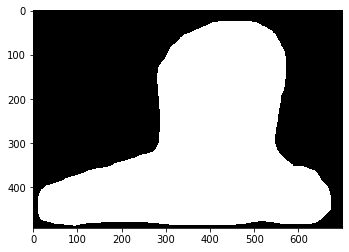

In [44]:
image = cv2.imread('person.jpg')
results = model.detect([image], verbose=1)
print(class_names[results[0]['class_ids'][0]])
print(results[0]['scores'][0])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(results[0]['masks'][:, :, 0], cmap='gray')
plt.show()